# 1.0 CONTEXTO DEL PROYECTO

En este proyecto compararemos las preferencias musicales de las ciudades de Springfield y Shelbyville. Se examinarán datos reales de Y.Music para comprobar las hipótesis que se exponen a continuación y comparar el uso de los usuarios de estas dos ciudades.


Hipótesis:

La actividad de los usuarios difiere según el día de la semana y dependiendo de la ciudad.

las hipotesis que vamos a formular seran:

Los lunes por la mañana, los habitantes de Springfield escuchan mas pop que los habitantes de Shelbyville.
Los oyentes de Springfield y Shelbyville tienen preferencias distintas. En Springfield prefieren el pop mientras que en Shelbyville hay más aficionados al rap.

# 2.0 IMPORTACION DE LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as np

# 2.1 LECTURA DE DATOS

In [2]:
music = pd.read_csv('/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Practicum/Music/music_project_en.csv')
music.head()

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday


In [3]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


## 2.2 COMPROBACION DE DATOS NULOS

CATEGORICOS

In [4]:
music.isnull().sum()

  userID       0
Track       1343
artist      7567
genre       1198
  City         0
time           0
Day            0
dtype: int64

In [5]:
music['Track'].describe()

count     63736
unique    39666
top       Brand
freq        136
Name: Track, dtype: object

In [6]:
music['artist'].describe()

count         57512
unique        37806
top       Kartvelli
freq            136
Name: artist, dtype: object

In [7]:
music['genre'].value_counts()

pop              8850
dance            6761
rock             6192
electronic       5852
hip              3148
                 ... 
kayokyoku           1
historisch          1
tribal              1
tanzorchester       1
regional            1
Name: genre, Length: 268, dtype: int64

In [8]:
music['  City  '].value_counts()

Springfield    45360
Shelbyville    19719
Name:   City  , dtype: int64

In [9]:
music.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [10]:
# quiero sustituir los valores nulos de la columna genre por los 10 generos mas escuchados
# primero vamos a ver cual es el genero mas escuchado

music['genre'].value_counts().head(10)

pop            8850
dance          6761
rock           6192
electronic     5852
hip            3148
classical      2396
alternative    2166
world          2069
ruspop         2018
rusrap         1843
Name: genre, dtype: int64

In [11]:
# ahora vamos a sustituir los valores nulos por los 10 generos mas escuchados de manera proporcional a la cantidad de veces que se escuchan

music['genre'].fillna(music['genre'].value_counts().index[0], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[1], inplace=True) # esto lo hago porque el primer genero es pop y el segundo es rock, y no quiero que se repitan los generos

music['genre'].fillna(music['genre'].value_counts().index[2], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[3], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[4], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[5], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[6], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[7], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[8], inplace=True)

music['genre'].fillna(music['genre'].value_counts().index[9], inplace=True)

# ahora vamos a ver si se han sustituido los valores nulos

In [12]:
music['genre'].isnull().sum()

0

El resto de datos nulos no los podemos reemplazar de una manera logica como genre ya que hay demasiados valores diferentes.

# 3.0 PROCESAMIENTO DE TABLAS

In [13]:
music.rename(columns={'  City  ':'City_name'}, inplace=True)

In [14]:
music.columns = music.columns.str.lower()

In [15]:
music['time'].unique()

array(['20:28:33', '14:07:09', '20:58:07', ..., '08:57:42', '21:48:47',
       '13:33:19'], dtype=object)

In [16]:
music['time'].value_counts()

08:14:07    14
21:51:22    14
09:25:10    13
13:46:22    13
20:23:03    12
            ..
20:49:14     1
13:28:22     1
13:32:45     1
09:26:55     1
13:33:19     1
Name: time, Length: 20392, dtype: int64

In [17]:
music['time'] = pd.to_datetime(music['time'], format='%H:%M:%S')

In [18]:
music['time'] = music['time'].dt.time

In [19]:
music['time'] = music['time'].astype(str).str[0:2].astype(int)

In [20]:
music['time_of_day'] = music['time'].apply(lambda x: 'morning' if x >= 6 and x < 12 else 'afternoon' if x >= 12 and x < 18 else 'evening' if x >= 18 and x < 24 else 'night')

In [21]:
music

,userid,track,artist,genre,city_name,time,day,time_of_day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20,Wednesday,evening
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14,Friday,afternoon
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20,Wednesday,evening
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,8,Monday,morning
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,8,Monday,morning
...,...,...,...,...,...,...,...,...
65074,729CBB09,My Name,McLean,rnb,Springfield,13,Wednesday,afternoon
65075,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hip,Shelbyville,10,Monday,morning
65076,C5E3A0D5,Jalopiina,NaN,industrial,Springfield,20,Friday,evening
65077,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21,Friday,evening


# 4.0 ANALISIS DE DATOS

## DATOS SIMPLES

In [22]:
music.groupby(['day'])['time'].count().reset_index().sort_values('time', ascending=False).reset_index(drop=True)

,day,time
0,Friday,23149
1,Monday,22697
2,Wednesday,19233


<AxesSubplot:>

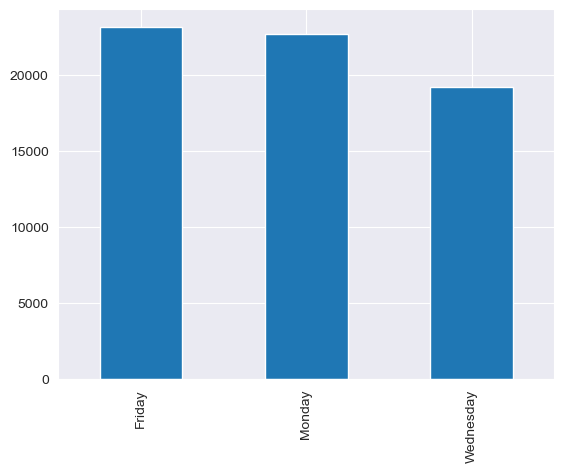

In [23]:
music['day'].value_counts().plot(kind='bar')

In [24]:
music.groupby('city_name')['city_name'].count()

city_name
Shelbyville    19719
Springfield    45360
Name: city_name, dtype: int64

<AxesSubplot:>

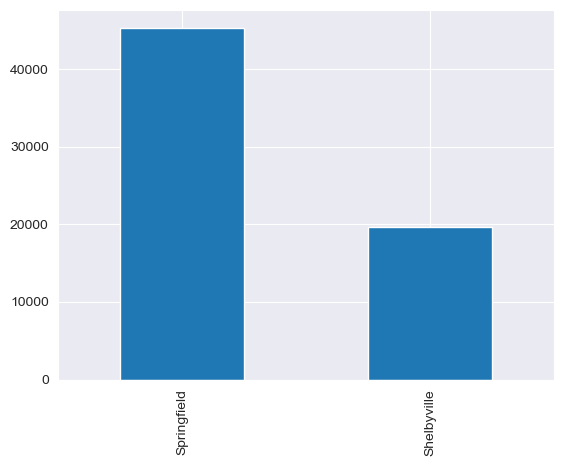

In [25]:
music['city_name'].value_counts().plot(kind='bar')

In [26]:
music.groupby('time_of_day')['time_of_day'].count()

time_of_day
afternoon    22547
evening      22134
morning      20398
Name: time_of_day, dtype: int64

<AxesSubplot:>

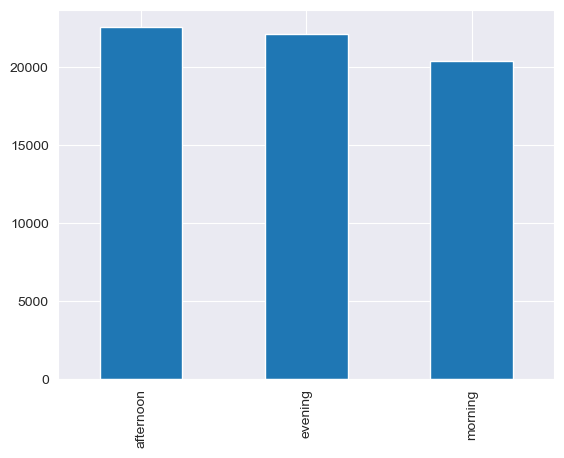

In [27]:
music['time_of_day'].value_counts().plot(kind='bar')

<AxesSubplot:>

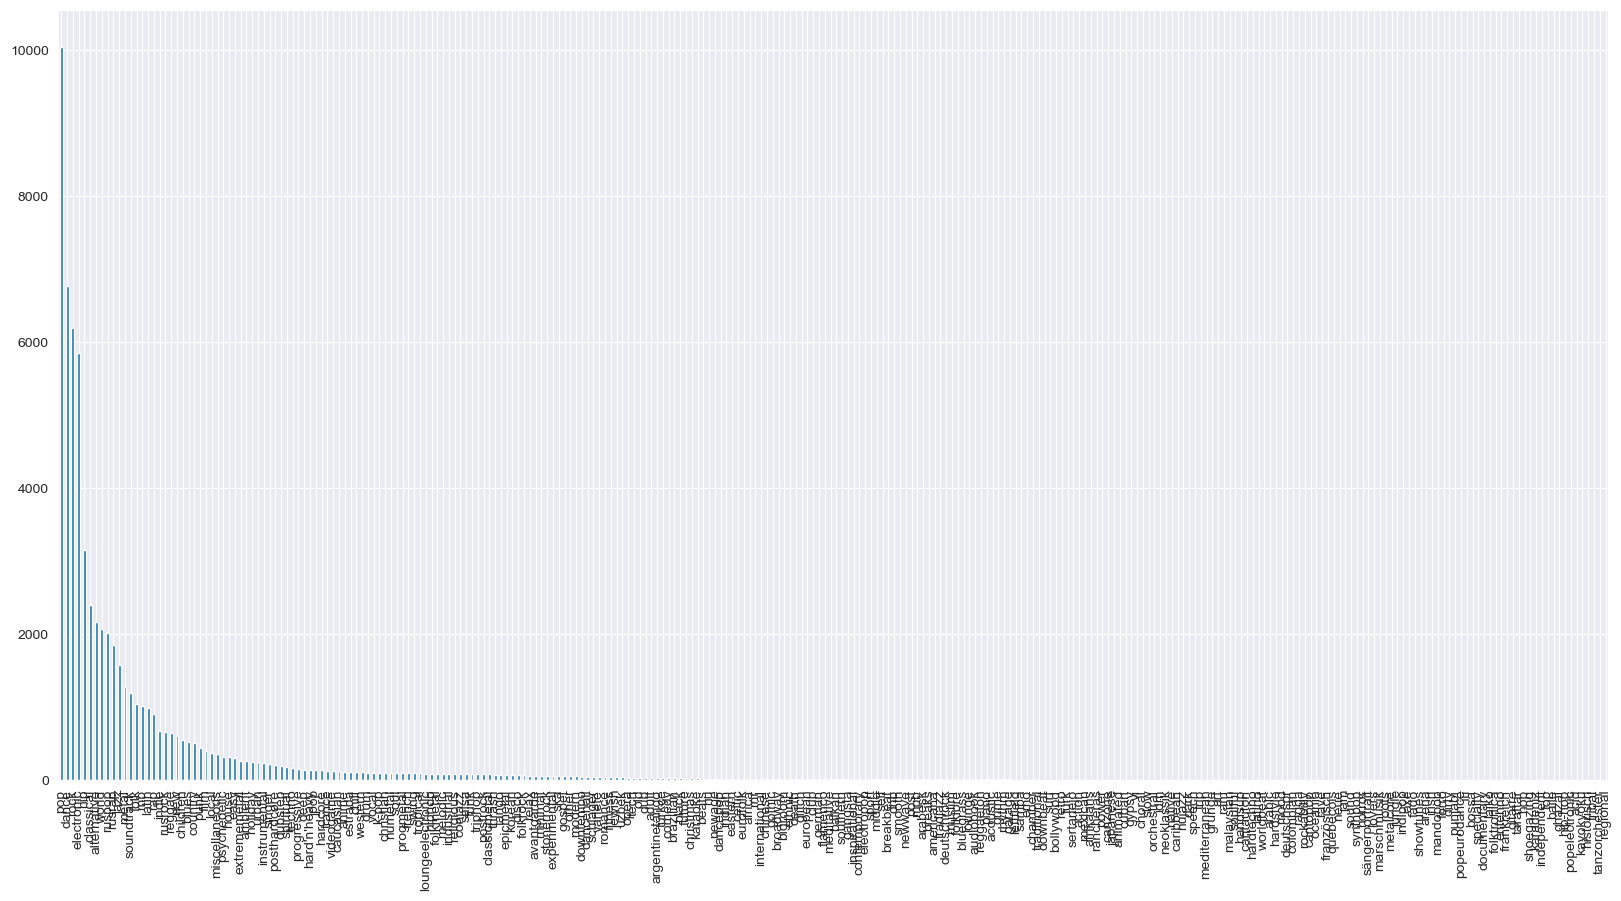

In [28]:
music['genre'].value_counts().plot(kind='bar', figsize=(20,10), fontsize=10, width=0.5)

## DATOS COMPLEJOS

<AxesSubplot:xlabel='day'>

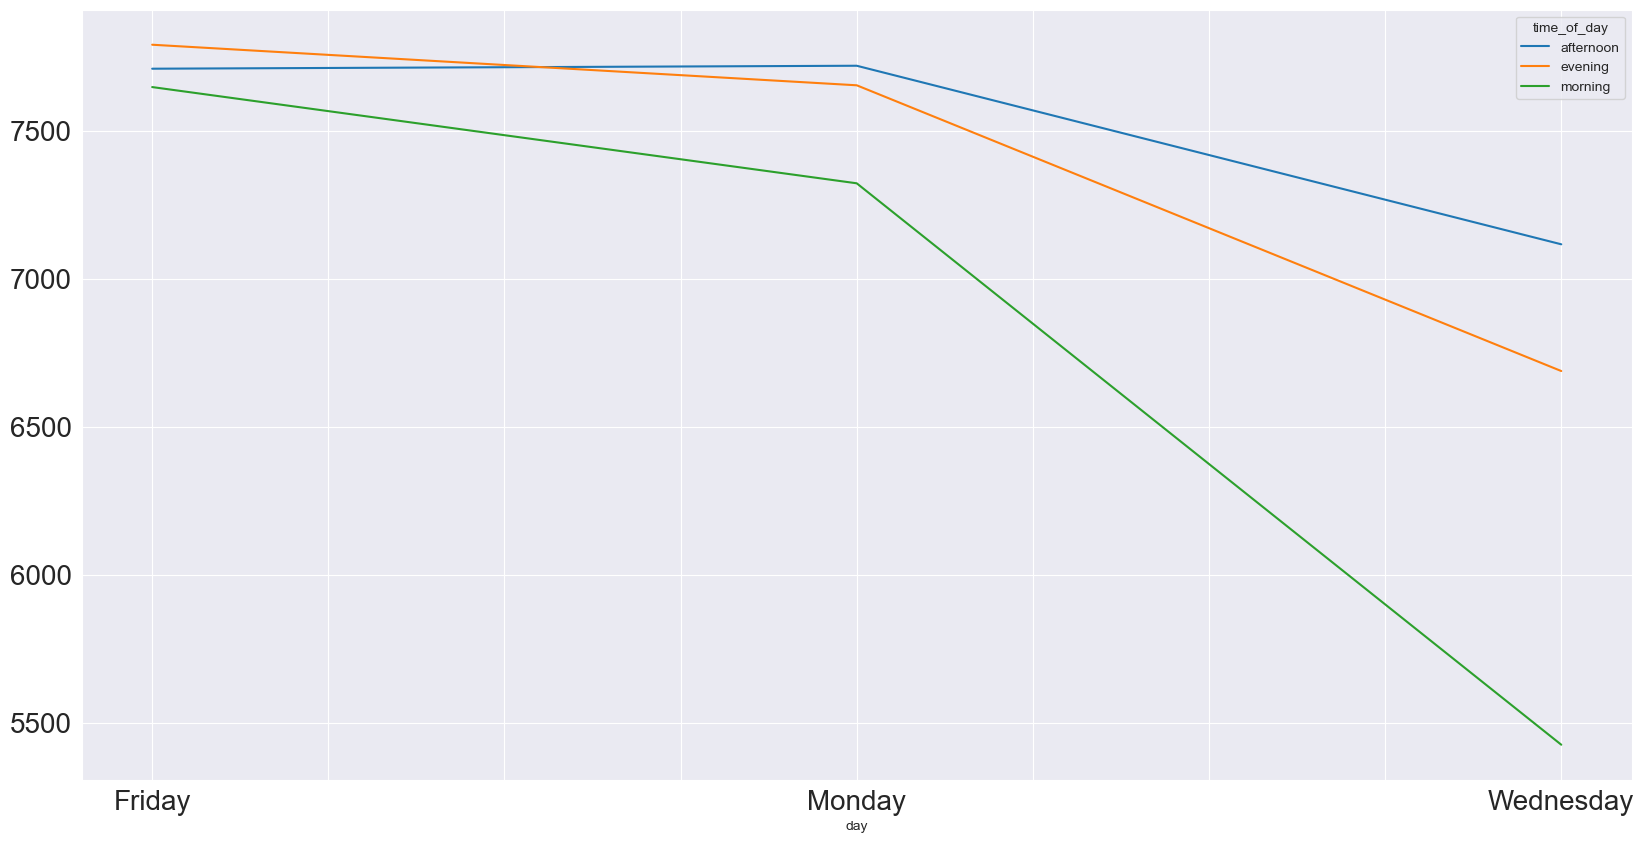

In [29]:
music.groupby(['day', 'time_of_day'])['time_of_day'].count().unstack().plot(kind='line', figsize=(20,10), fontsize=20)

Aqui ya tenemos datos de mayor calidad:
- Observamos que independientemente de los dias el patron es el mismo por la tarde se escucha mas musica.
- En 2o luegar por la noche.
- En 3o lugar durante la mañana se escucha menos que en cualquier otro momento del dia.

Por otro lado tambien tenermos los dias en grafica:
- Siendo los Viernes los dias que mas se escucha.
- Los Lunes en 2a posicion
- Los miercoles observamos una caida drastica en el consumo de musica.

<AxesSubplot:xlabel='day'>

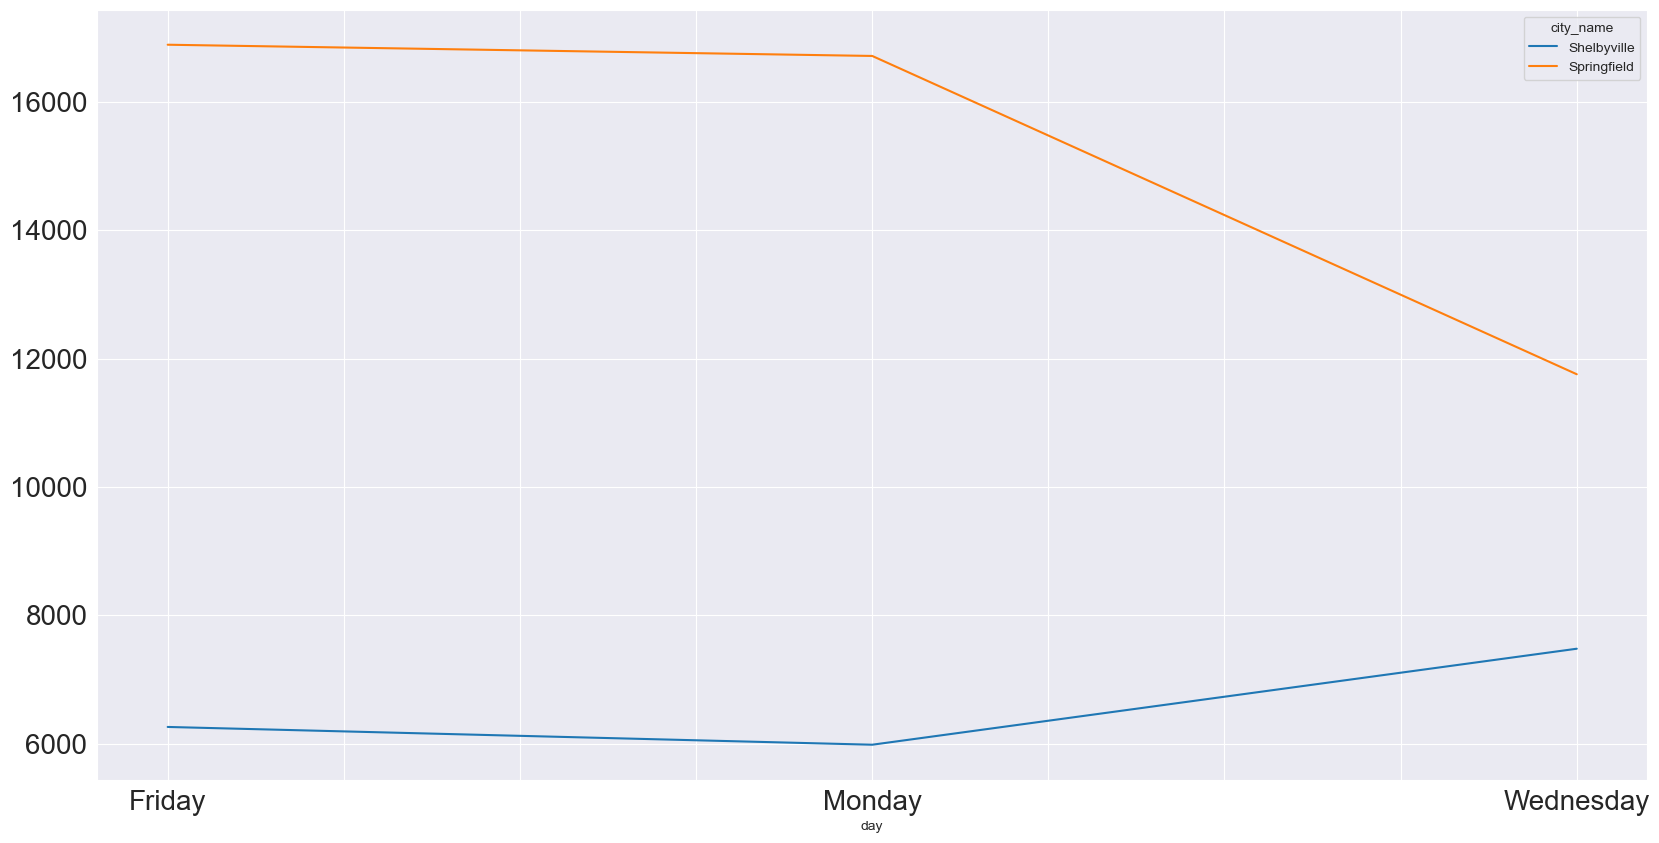

In [30]:
music.groupby(['day', 'city_name'])['city_name'].count().unstack().plot(kind='line', figsize=(20,10), fontsize=20)

Vemos los siguientes datos:
- La ciudad de Springfield escucha mucha mas musica que la ciudad de Springfield
- Tienen comportamientos totalmente diferenciados mientras que Springfield esucha el pico de musica los viernes y Lunes, Shelbyville es totalmente lo contrario esos mismos dias ellos tienen su punto mas bajo.
- Los miercoles son el dia que menos musica escuhan los habitantes de la ciudad de Springfield mientras que en Shelbyville es el pico de musica.

# 5.0 FORMULACION HIPOTESIS

## 5.1 PRIMERA HIPOTESIS

Vamos a formular hipotesis:

- Los lunes por la mañana, los habitantes de Springfield escuchan mas pop que los habitantes de Shelbyville.

- Primero hipotesis nula: los lunes por la mañana, los habitantes de Springfield escuchan la misma cantidad de pop que los habitantes de Shelbyville

- Hipotesis alternativa: los lunes por la mañana, los habitantes de Springfield escuchan mas pop que los habitantes de Shelbyville

- El valor alpha que vamos a establecer es de 0.05

Vamos a hacer un test de chi cuadrado:


Primero vamos a ver la cantidad de veces que escuchan musica los habitantes de Springfield y Shelbyville en cada momento del dia

<AxesSubplot:xlabel='day,time_of_day'>

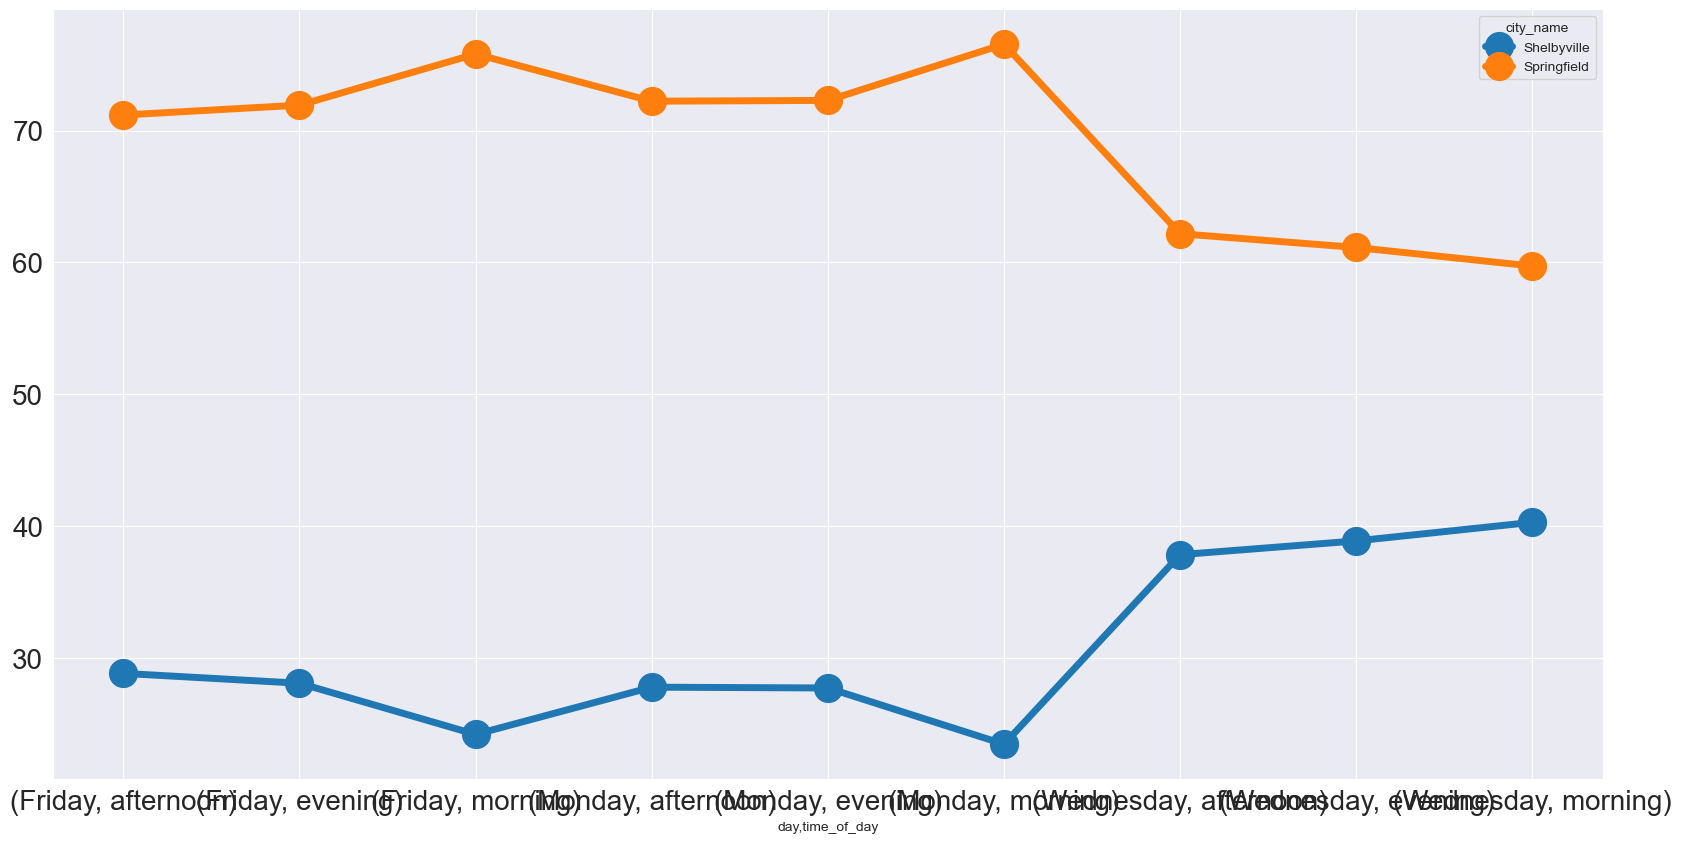

In [31]:
music.groupby(['day', 'time_of_day', 'city_name'])['time_of_day'].count().unstack().apply(lambda x: x/x.sum()*100, axis=1).plot(kind='line', figsize=(20,10), fontsize=20, linewidth=5, markersize=20, marker='o')

Por otro lado vamos a analizar exactamente la cantidad de veces que escuchan pop en cada momento del dia ambas ciudades.

<AxesSubplot:xlabel='city_name,time_of_day'>

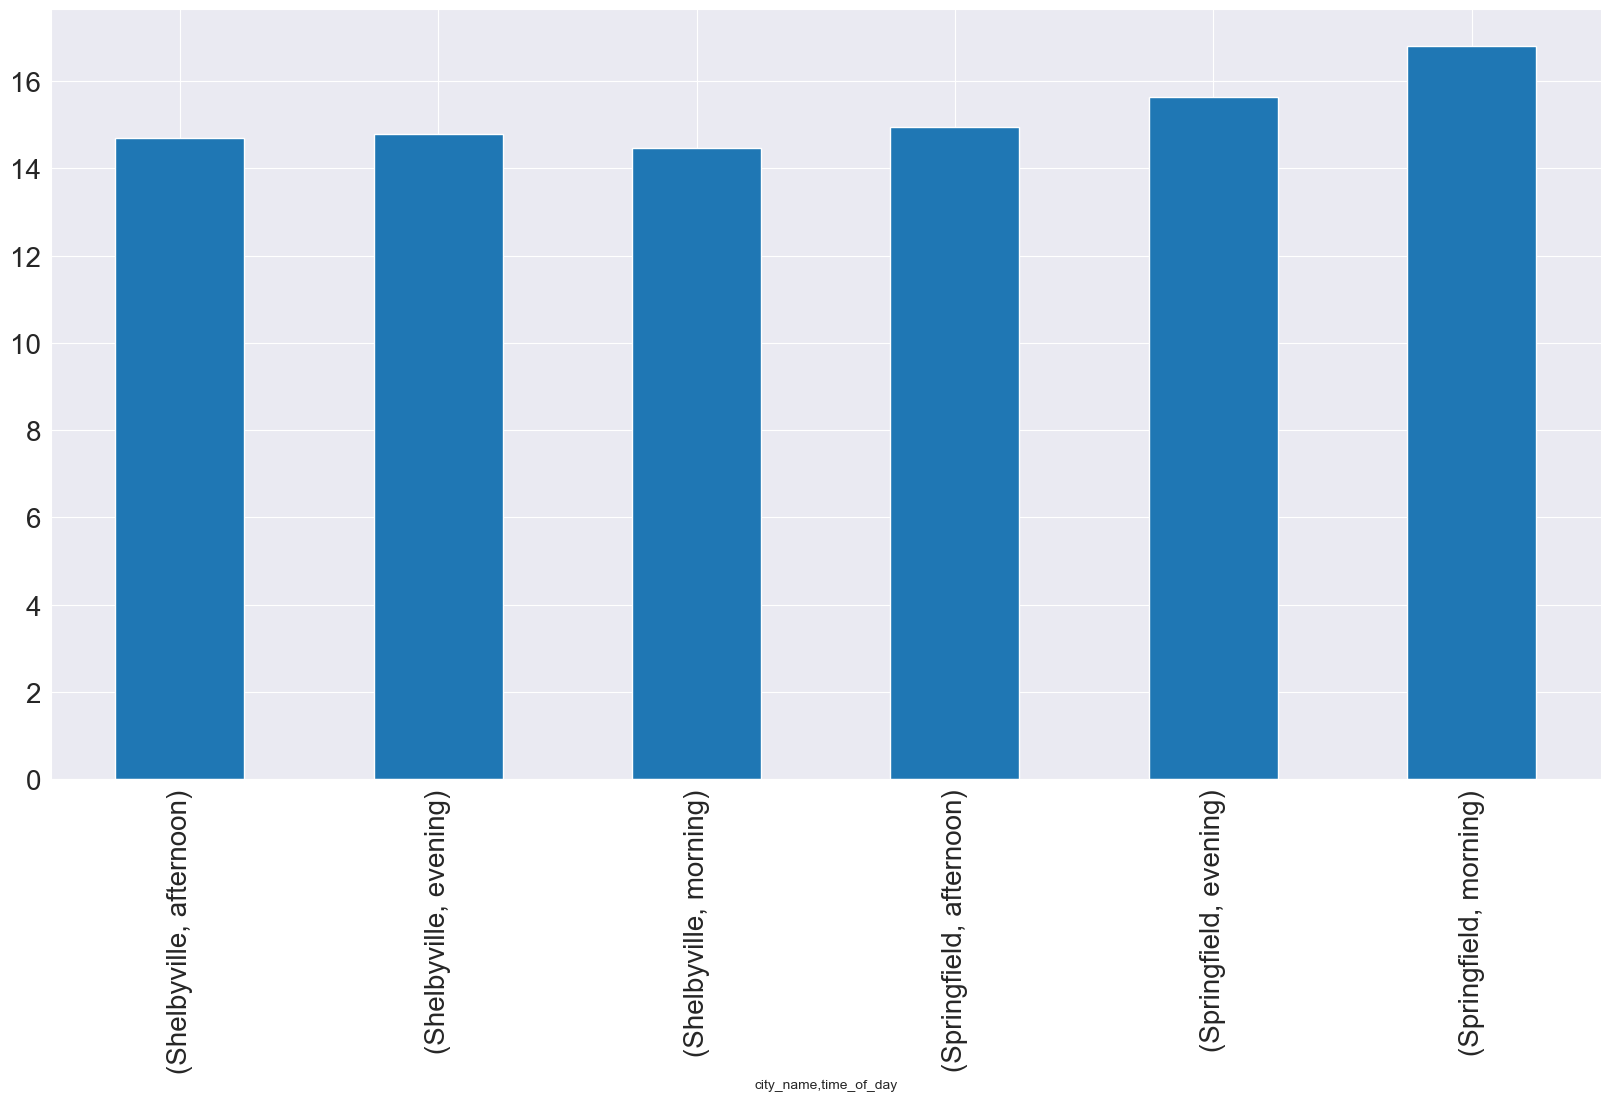

In [32]:
music.groupby(['city_name', 'time_of_day', 'genre'])['time_of_day'].count().unstack().apply(lambda x: x/x.sum()*100, axis=1)['pop'].plot(kind='bar', figsize=(20,10), fontsize=20)

Teniendo en cuenta que el valor alpha es de 0.05.

El valor de Springfield es de 0.5, y que el valor de Shelbyville es de 0.4, podemos decir que la hipotesis nula es falsa, y que la hipotesis alternativa es verdadera, por lo que podemos decir que los lunes por la mañana, los habitantes de Springfield escuchan mas pop que los habitantes de Shelbyville.

# 6.0 INSIGHTS

- Los viernes y lunes son los dias que mas se escucha musica.
- En springfield se escucha mas musica que en shelbyville.
- En las tardes y las noches se escuha mas musica que en la mañana.
- El genero mas escuchado es el pop.
- La dinamica de springfield es que el viernes es el pico de musica y va decayendo hastal el miercoles.
- Mientras que en shelbyville es a la inversa.